## Questions I aim to ask in this project:

* Can we predict the number of streams a song will get (on Spotify) based on its audio features (danceability, energy, loudness, etc.) and metadata (artist, album type)?

* What factors contribute to a higher number of views, likes, and comments on the YouTube videos of these songs and can we predict them?

* Is there a correlation between the number of streams on Spotify and the number of views/likes on YouTube for the same song?

### 

__Tools I intend to use:__

Linear Regression, Random Forest, Neural Networks, Decision Trees, SVM, k-NN, Adaboost.

## About the Spotify - Youtube Dataset

Dataset of songs of various artist in the world and for each song is present:

* Several statistics of the music version on spotify, including the number of streams;
* Number of views of the official music video of the song on youtube.

### Content
It includes 26 variables for each of the songs collected from spotify. These variables are briefly described next:

* __Track__: name of the song, as visible on the Spotify platform.

* __Artist__: name of the artist.

* __Url_spotify__: the Url of the artist.

* __Album__: the album in wich the song is contained on Spotify.

* __Album_type__: indicates if the song is relesead on Spotify as a single or contained in an album.

* __Uri__: a spotify link used to find the song through the API.

* __Danceability__: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* __Energy__: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* __Key__: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* __Loudness__: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* __Speechiness__: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* __Acousticness__: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* __Instrumentalness__: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* __Liveness__: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* __Valence__: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* __Tempo__: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* __Duration_ms__: the duration of the track in milliseconds.

* __Stream__: number of streams of the song on Spotify.

* __Url_youtube__: url of the video linked to the song on Youtube, if it have any.

* __Title__: title of the videoclip on youtube.

* __Channel__: name of the channel that have published the video.

* __Views__: number of views.

* __Likes__: number of likes.

* __Comments__: number of comments.

* __Description__: description of the video on Youtube.

* __Licensed__: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.

* __official_video__: boolean value that indicates if the video found is the official video of the song.

In [125]:
import pandas as pd

# Load the dataset
file_path = 'Spotify_Youtube.csv'
data = pd.read_csv(file_path)

# Handle missing values
data = data.dropna()

# Drop duplicate rows
data = data[~data.duplicated()]

# Drop unnecessary columns 
data = data.drop(['Unnamed: 0', "Url_spotify", "Uri", "Url_youtube", "Licensed", "official_video"], axis=1)

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Display the full numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Display the dataset
data

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.000,-6.679,0.177,0.008,0.002,0.613,0.772,138.559,222640.000,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.000,6220896.000,169907.000,Official HD Video for Gorillaz' fantastic trac...,1040234854.000
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.000,-5.815,0.030,0.087,0.001,0.046,0.852,92.761,200173.000,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.000,1079128.000,31003.000,The official video for Gorillaz - Rhinestone E...,310083733.000
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.000,-3.930,0.052,0.043,0.047,0.116,0.551,108.014,215150.000,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.000,282142.000,7399.000,Gorillaz - New Gold ft. Tame Impala & Bootie B...,63063467.000
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.000,-5.810,0.026,0.000,0.509,0.064,0.578,120.423,233867.000,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.000,1788577.000,55229.000,Follow Gorillaz online:\nhttp://gorillaz.com \...,434663559.000
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.000,-8.627,0.171,0.025,0.000,0.070,0.525,167.953,340920.000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.000,6197318.000,155930.000,The official music video for Gorillaz - Clint ...,617259738.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.000,-6.344,0.033,0.448,0.000,0.084,0.658,90.002,94667.000,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.000,1113.000,0.000,Provided to YouTube by Routenote\n\nJUST DANCE...,9227144.000
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.000,-1.786,0.137,0.028,0.000,0.092,0.657,174.869,150857.000,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.000,2019.000,0.000,Provided to YouTube by Routenote\n\nSET FIRE T...,10898176.000
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.000,-4.679,0.065,0.024,0.000,0.154,0.419,168.388,136842.000,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.000,329.000,0.000,Provided to YouTube by Routenote\n\nOUTSIDE HA...,6226110.000
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.000,-4.004,0.419,0.356,0.018,0.108,0.539,155.378,108387.000,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.000,88.000,0.000,Provided to YouTube by Routenote\n\nONLY GIRL ...,6873961.000


In [126]:
data.info()
data.columns


<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19170 non-null  object 
 1   Track             19170 non-null  object 
 2   Album             19170 non-null  object 
 3   Album_type        19170 non-null  object 
 4   Danceability      19170 non-null  float64
 5   Energy            19170 non-null  float64
 6   Key               19170 non-null  float64
 7   Loudness          19170 non-null  float64
 8   Speechiness       19170 non-null  float64
 9   Acousticness      19170 non-null  float64
 10  Instrumentalness  19170 non-null  float64
 11  Liveness          19170 non-null  float64
 12  Valence           19170 non-null  float64
 13  Tempo             19170 non-null  float64
 14  Duration_ms       19170 non-null  float64
 15  Title             19170 non-null  object 
 16  Channel           19170 non-null  object 
 17

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Stream'],
      dtype='object')

In [127]:
data.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000
mean,0.621,0.636,5.293,-7.615,0.095,0.288,0.055,0.191,0.528,120.607,224761.202,97197683.382,682353.145,28386.558,138274645.540
std,0.166,0.213,3.580,4.618,0.105,0.286,0.193,0.165,0.245,29.588,127846.796,279999663.313,1820550.190,197797.860,247730902.135
min,0.000,0.000,0.000,-46.251,0.000,0.000,0.000,0.015,0.000,0.000,30985.000,26.000,0.000,0.000,6574.000
25%,0.520,0.510,2.000,-8.745,0.036,0.044,0.000,0.094,0.338,96.998,180267.000,2070213.000,24473.500,583.000,17869370.250
50%,0.639,0.667,5.000,-6.504,0.051,0.188,0.000,0.125,0.535,119.969,213321.000,15689592.000,133277.000,3515.500,50379376.500
75%,0.742,0.798,8.000,-4.918,0.104,0.469,0.000,0.234,0.724,139.946,251963.000,73690397.750,542346.250,14941.000,140757852.500
max,0.975,1.000,11.000,0.920,0.964,0.996,1.000,1.000,0.993,243.372,4676058.000,8079649362.000,50788652.000,16083138.000,3386520288.000


In [128]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Artist', 'Track', 'Album', 'Album_type', 'Title', 'Channel', 'Description']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


data

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Stream
0,675,4597,2487,0,0.818,0.705,6.000,-6.679,0.177,0.008,0.002,0.613,0.772,138.559,222640.000,5818,1833,693555221.000,6220896.000,169907.000,8297,1040234854.000
1,675,11457,7313,0,0.676,0.703,8.000,-5.815,0.030,0.087,0.001,0.046,0.852,92.761,200173.000,5822,1833,72011645.000,1079128.000,31003.000,13690,310083733.000
2,675,9554,6553,2,0.695,0.923,1.000,-3.930,0.052,0.043,0.047,0.116,0.551,108.014,215150.000,5819,1833,8435055.000,282142.000,7399.000,4721,63063467.000
3,675,10082,7313,0,0.689,0.739,2.000,-5.810,0.026,0.000,0.509,0.064,0.578,120.423,233867.000,5821,1833,211754952.000,1788577.000,55229.000,4236,434663559.000
4,675,2674,3913,0,0.663,0.694,10.000,-8.627,0.171,0.025,0.000,0.070,0.525,167.953,340920.000,5814,1833,618480958.000,6197318.000,155930.000,13544,617259738.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,1589,6868,4798,2,0.582,0.926,5.000,-6.344,0.033,0.448,0.000,0.084,0.658,90.002,94667.000,6778,4168,71678.000,1113.000,0.000,10223,9227144.000
20714,1589,11713,8005,2,0.531,0.936,4.000,-1.786,0.137,0.028,0.000,0.092,0.657,174.869,150857.000,13100,4168,164741.000,2019.000,0.000,10231,10898176.000
20715,1589,9969,6795,2,0.443,0.830,4.000,-4.679,0.065,0.024,0.000,0.154,0.419,168.388,136842.000,11359,4168,35646.000,329.000,0.000,10227,6226110.000
20716,1589,9959,6785,2,0.417,0.767,9.000,-4.004,0.419,0.356,0.018,0.108,0.539,155.378,108387.000,11353,4168,6533.000,88.000,0.000,10226,6873961.000


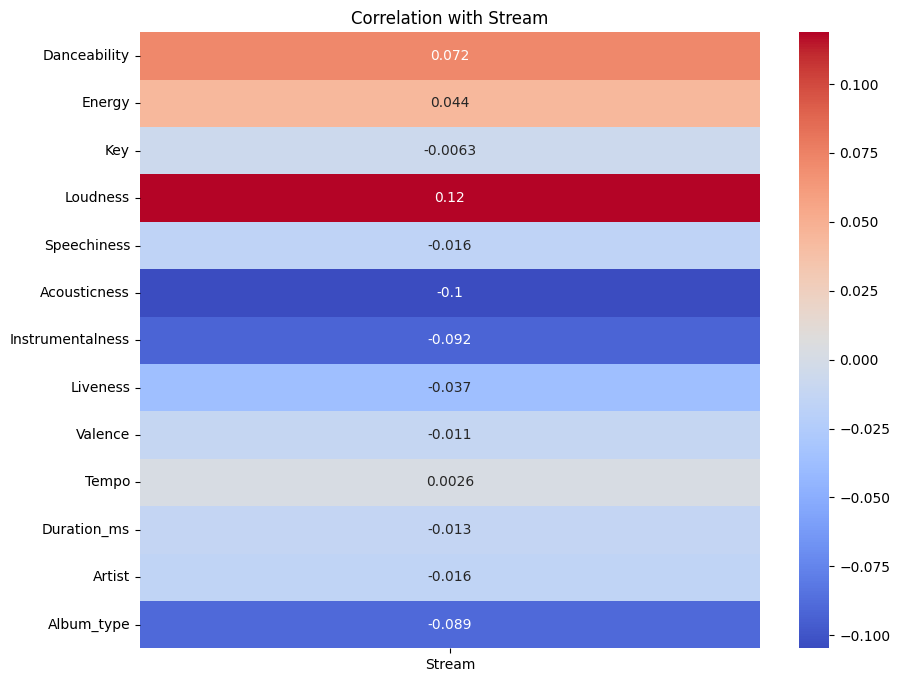

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis for 'Spotify' (Stream)

# Select the relevant columns
features_streams = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
target_streams = 'Stream'

# Calculate the correlation matrix
corr_matrix_streams = data[features_streams + [target_streams]].corr()

# Extract the correlation values for the target variable 'Stream'
corr_streams = corr_matrix_streams[[target_streams]].drop(target_streams)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_streams, annot=True, cmap='coolwarm')
plt.title('Correlation with Stream')
plt.show()

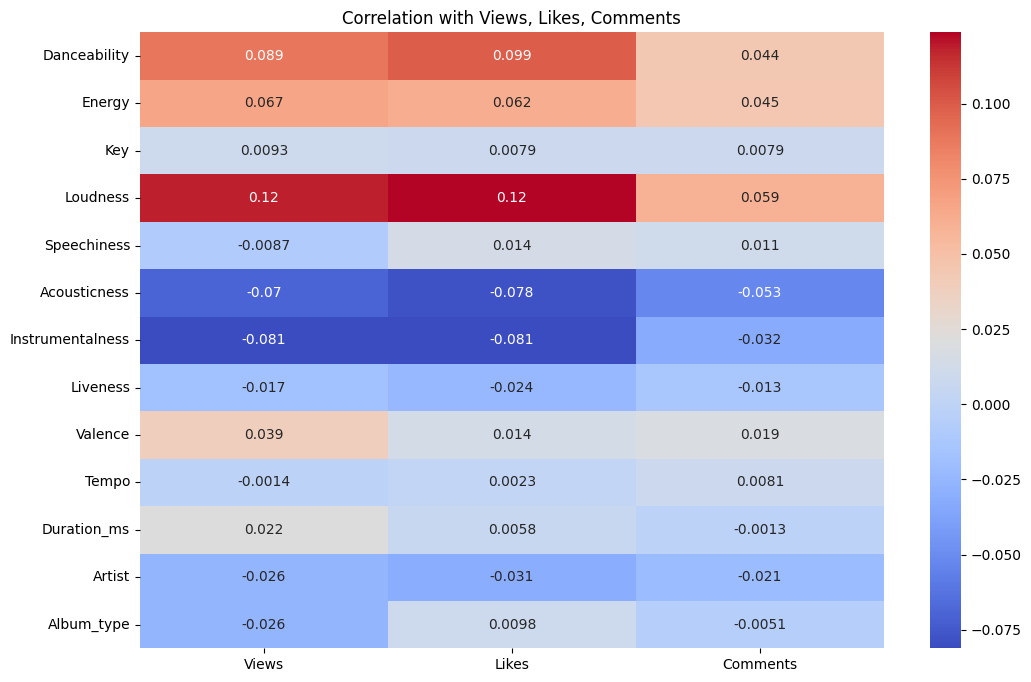

In [130]:
# Correlation Analysis for Youtube ('Views', 'Likes', 'Comments')

# Select the relevant columns
features_youtube = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
target_youtube = ['Views', 'Likes', 'Comments']

# Calculate the correlation matrix
corr_matrix_youtube = data[features_youtube + target_youtube].corr()

# Extract the correlation values for the target variables
corr_youtube = corr_matrix_youtube[target_youtube].drop(target_youtube, axis=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_youtube, annot=True, cmap='coolwarm')
plt.title('Correlation with Views, Likes, Comments')
plt.show()

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Features and target variable for different questions
# features_streams = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
features_streams = ['Danceability', 'Energy', 'Loudness', 'Tempo', 'Duration_ms', 'Artist']
target_streams = 'Stream'

features_youtube = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
target_youtube = ['Views', 'Likes', 'Comments']

X_streams = data[features_streams]
y_streams = data[target_streams]

X_youtube = data[features_youtube]
y_youtube = data[target_youtube]

# Split the data
X_train_streams, X_test_streams, y_train_streams, y_test_streams = train_test_split(X_streams, y_streams, test_size=0.2, random_state=42)
X_train_youtube, X_test_youtube, y_train_youtube, y_test_youtube = train_test_split(X_youtube, y_youtube, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_streams_scaled = scaler.fit_transform(X_train_streams)
X_test_streams_scaled = scaler.transform(X_test_streams)

X_train_youtube_scaled = scaler.fit_transform(X_train_youtube)
X_test_youtube_scaled = scaler.transform(X_test_youtube)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVM': SVR()
}

In [134]:
print('Spotify')
for name, model in models.items():
    model.fit(X_train_streams_scaled, y_train_streams)
    y_pred = model.predict(X_test_streams_scaled)
    print(f"{name} - MSE:", mean_squared_error(y_test_streams, y_pred))
    print(f"{name} - R2 Score:", r2_score(y_test_streams, y_pred))
    print()

Spotify
Linear Regression - MSE: 5.500792347992509e+16
Linear Regression - R2 Score: 0.02352296886073768

Random Forest - MSE: 4.893219996827141e+16
Random Forest - R2 Score: 0.13137660305305077

Decision Tree - MSE: 1.0377965638356442e+17
Decision Tree - R2 Score: -0.8422518856771393

SVM - MSE: 6.361828950817095e+16
SVM - R2 Score: -0.12932455063074588



In [ ]:
print('Youtube')
for target in target_youtube:
    print(f'Models for {target}')
    for name, model in models.items():
        model.fit(X_train_youtube_scaled, y_train_youtube[target])
        y_pred = model.predict(X_test_youtube_scaled)
        print(f"{name} - MSE:", mean_squared_error(y_test_youtube[target], y_pred))
        print(f"{name} - R2 Score:", r2_score(y_test_youtube[target], y_pred))
        print()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [6, 12, 25, 50],
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01]
}

# Function to perform grid search and print the best parameters and scores
def grid_search_adaboost(X_train, y_train, X_test, y_test):
    ada = AdaBoostRegressor()
    grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and score
    print("Best parameters found: ", grid_search.best_params_)
    print("Best R2 score: ", grid_search.best_score_)
    print()

    # Predict with best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print("Test MSE:", mean_squared_error(y_test, y_pred))
    print("Test R2 Score:", r2_score(y_test, y_pred))
    print()

# Perform grid search for Spotify streams
print('Spotify AdaBoost Hyperparameter Tuning')
grid_search_adaboost(X_train_streams_scaled, y_train_streams, X_test_streams_scaled, y_test_streams)

# Perform grid search for YouTube metrics
print('Youtube AdaBoost Hyperparameter Tuning')
for target in target_youtube:
    print(f'AdaBoost Tuning for {target}')
    grid_search_adaboost(X_train_youtube_scaled, y_train_youtube[target], X_test_youtube_scaled, y_test_youtube[target])


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'n_estimators': list(range(10, 100)),
    'learning_rate': uniform(0.0001, 0.1)
}

# Function to perform random search and print the best parameters and scores for AdaBoost
def random_search_adaboost(X_train, y_train, X_test, y_test):
    ada = AdaBoostRegressor()
    random_search = RandomizedSearchCV(estimator=ada, param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', random_state=42)
    random_search.fit(X_train, y_train)
    
    # Print best parameters and score
    print("Best parameters found: ", random_search.best_params_)
    print("Best R2 score: ", random_search.best_score_)
    
    # Predict with best model
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print("Test MSE:", mean_squared_error(y_test, y_pred))
    print("Test R2 Score:", r2_score(y_test, y_pred))
    print()

# Perform random search for Spotify streams
print('Spotify AdaBoost Hyperparameter Tuning')
random_search_adaboost(X_train_streams_scaled, y_train_streams, X_test_streams_scaled, y_test_streams)

# Perform random search for YouTube metrics
print('YouTube AdaBoost Hyperparameter Tuning')
for target in target_youtube:
    print(f'AdaBoost Tuning for {target}')
    random_search_adaboost(X_train_youtube_scaled, y_train_youtube[target], X_test_youtube_scaled, y_test_youtube[target])


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': list(range(5, 50))  # Search for n_neighbors from 1 to 20
}

# Function to perform grid search and print the best parameters and scores for KNN
def grid_search_knn(X_train, y_train, X_test, y_test):
    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and score
    print("Best n_neighbors found: ", grid_search.best_params_)
    print("Best R2 score: ", grid_search.best_score_)
    
    # Predict with best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print("Test MSE:", mean_squared_error(y_test, y_pred))
    print("Test R2 Score:", r2_score(y_test, y_pred))
    print()

# Perform grid search for Spotify streams
print('Spotify KNN Hyperparameter Tuning')
grid_search_knn(X_train_streams_scaled, y_train_streams, X_test_streams_scaled, y_test_streams)

# Perform grid search for YouTube metrics
print('YouTube KNN Hyperparameter Tuning')
for target in target_youtube:
    print(f'KNN Tuning for {target}')
    grid_search_knn(X_train_youtube_scaled, y_train_youtube[target], X_test_youtube_scaled, y_test_youtube[target])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_streams_scaled = scaler.fit_transform(X_train_streams_scaled)
X_test_streams_scaled = scaler.transform(X_test_streams_scaled)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_streams_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_streams_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_streams_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_streams_scaled.values, dtype=torch.float32)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train_streams_scaled.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor).squeeze()

print('Neural Network for Streams:')
print('MSE:', mean_squared_error(y_test_tensor.numpy(), y_pred_tensor.numpy()))
print('R2 Score:', r2_score(y_test_tensor.numpy(), y_pred_tensor.numpy()))
